<a href="https://colab.research.google.com/github/WaSilveira/transfer-learning-cats-dogs/blob/main/Transfer_Learning_Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Instalando Dependências
!pip install tensorflow tensorflow-datasets matplotlib
!pip install keras # install keras
!pip install --upgrade tensorflow
!pip install --upgrade keras

In [9]:
#Preparação dos Dados - Importando Bibliotecas
import tensorflow as tf
import tensorflow_datasets as tfds # Make sure this line is present and executed
import matplotlib.pyplot as plt
import numpy as np


In [10]:
#Preparação dos Dados - Carregando o Dataset
# Carregar dataset usando TFDS
(raw_train, raw_validation), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Verificar estrutura
print(f"Exemplos de treino: {len(raw_train)}")
print(f"Exemplos de validação: {len(raw_validation)}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.VWZ0E1_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Exemplos de treino: 18610
Exemplos de validação: 4652


In [11]:
#Preparação de Dados - Pré-processamento
# Tamanho das imagens para o MobileNetV2
IMG_SIZE = 160

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1  # Normalização para [-1, 1]
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Aplicar transformações
train = raw_train.map(format_image)
validation = raw_validation.map(format_image)

# Configurar batches
BATCH_SIZE = 32
train_batches = train.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_batches = validation.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) # This line defines validation_batches


In [12]:
#Construção do Modelo - Carregando o Modelo Base
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Congele as camadas base
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
#Construção do Modelo - Adicionando Camadas Personalizadas
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [14]:
#Construção do Modelo - Compilando o Modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()  # Verifique a arquitetura


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
#Treinamento - Execução
EPOCHS = 10

history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=validation_batches
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 497s 841ms/step - accuracy: 0.9580 - loss: 0.1219 - val_accuracy: 0.9839 - val_loss: 0.0470
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 483s 827ms/step - accuracy: 0.9852 - loss: 0.0431 - val_accuracy: 0.9845 - val_loss: 0.0441
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 441s 755ms/step - accuracy: 0.9863 - loss: 0.0382 - val_accuracy: 0.9843 - val_loss: 0.0434
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 439s 752ms/step - accuracy: 0.9879 - loss: 0.0357 - val_accuracy: 0.9834 - val_loss: 0.0439
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 424s 725ms/step - accuracy: 0.9886 - loss: 0.0316 - val_accuracy: 0.9841 - val_loss: 0.0451
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 480s 822ms/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.9839 - val_loss: 0.0458
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 419s 715ms/step - accuracy: 0.9900 - loss: 0.0284 - val_accuracy: 0.9834 - val_loss: 0.0470
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 441s 715ms/step - accuracy: 0.9908 -

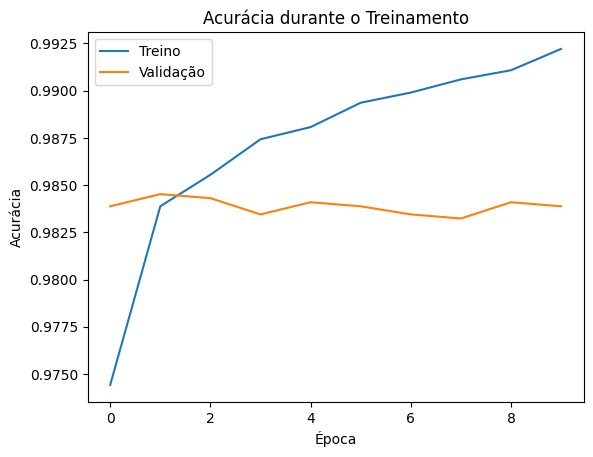

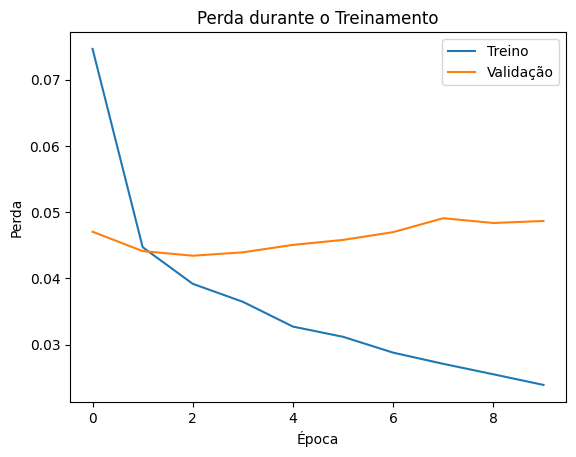

In [17]:
#Treinamento - Visualizando o Progresso
# Gráfico de acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()
plt.show()

# Gráfico de loss
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o Treinamento')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()
plt.show()


In [18]:
#Avaliação e Testes - Avaliação com os Dados da Validação
loss, accuracy = model.evaluate(validation_batches)
print(f"\nAcurácia final na validação: {accuracy*100:.2f}%")


146/146 ━━━━━━━━━━━━━━━━━━━━ 84s 577ms/step - accuracy: 0.9872 - loss: 0.0400

Acurácia final na validação: 98.39%


In [19]:
# Obter uma imagem de exemplo do conjunto de validação
for images, labels in validation_batches.take(1):
    test_image = images[0]
    true_label = "Cachorro" if labels[0] else "Gato"

# Expandir dimensões para simular um batch de uma única imagem
test_array = tf.expand_dims(test_image, axis=0)


In [20]:
# Fazer a predição
prediction = model.predict(test_array)
predicted_class = "Cachorro" if prediction[0][0] > 0.5 else "Gato"

print(f"Predição: {predicted_class}")
print(f"Classe real: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predição: Cachorro
Classe real: Cachorro


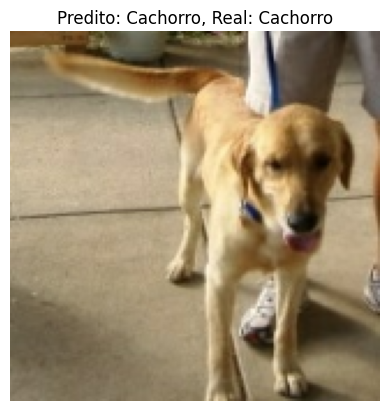

In [21]:
# Visualizar a imagem
import matplotlib.pyplot as plt

plt.imshow(test_image * 0.5 + 0.5)  # Desnormalização para visualização
plt.title(f"Predito: {predicted_class}, Real: {true_label}")
plt.axis('off')
plt.show()


In [23]:
model.save('gatos_vs_cachorros.h5')


In [24]:
# Descongele parte do modelo base
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompile com learning rate menor
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Treine novamente
model.fit(train_batches, epochs=5, validation_data=validation_batches)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 732s 1s/step - accuracy: 0.9209 - loss: 0.2128 - val_accuracy: 0.9764 - val_loss: 0.0795
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 716s 1s/step - accuracy: 0.9735 - loss: 0.0729 - val_accuracy: 0.9789 - val_loss: 0.0633
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 739s 1s/step - accuracy: 0.9813 - loss: 0.0501 - val_accuracy: 0.9787 - val_loss: 0.0607
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 684s 1s/step - accuracy: 0.9846 - loss: 0.0431 - val_accuracy: 0.9787 - val_loss: 0.0596
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 652s 1s/step - accuracy: 0.9882 - loss: 0.0328 - val_accuracy: 0.9789 - val_loss: 0.0586
